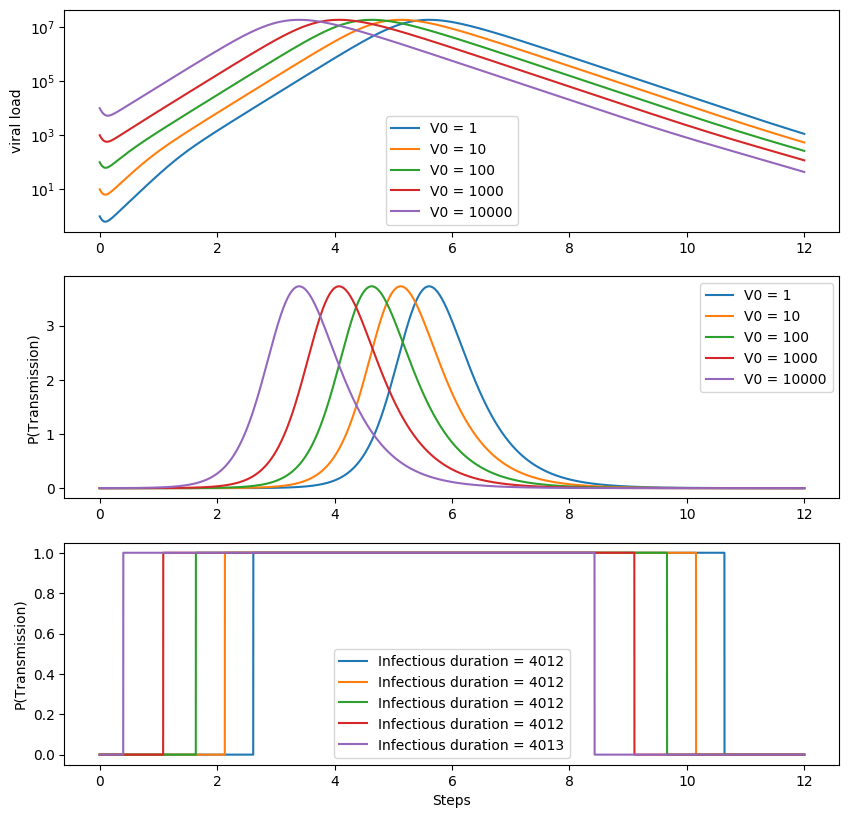

In [1]:
from matplotlib import pyplot
from numpy import linspace, where, array
from scipy.integrate import odeint
from math import log
import random


# make a nice, big figure
pyplot.figure(figsize=(10,10), dpi=100)

# make a subplot for the susceptible, infected and recovered individuals
axes_s = pyplot.subplot(311, yscale='log')
axes_s.set_ylabel("viral load")

axes_i = pyplot.subplot(312)
axes_i.set_ylabel("P(Transmission)")

axes_r = pyplot.subplot(313)
axes_r.set_ylabel("P(Transmission)")
axes_r.set_xlabel("Steps")

t = linspace(0, 12, num=6000)
# y = linspace(1,10000,5)
y = [1,10,100,1000,10000]

# #handel
# alpha = 0.0000022
# beta = 1.9
# prod = 1.2
# clear = 2.78
# susc = 25000000

# alpha = 0.00001
# beta = 1.9
# prod = 1.2
# clear = 2.78
# susc = 25000000

# li
alpha = 0.0000001
beta = 2
prod = 100
clear = 10
susc = 10000000

g = 1000
sig = 100
k1 = 0.001
k2 = 2
f0 = 1

def differential_TIV(n_TIV, t, alpha, beta, prod, clear,g,sig,k1,k2):
    dT_dt = -1 * alpha * n_TIV[0] * n_TIV[2]
    dI_dt = alpha * n_TIV[0] * n_TIV[2] - beta * n_TIV[1]
    dV_dt = (prod/(1+(k1*n_TIV[3]))) * n_TIV[1] - clear * n_TIV[2]
    dF_dt = g*n_TIV[1] - sig*n_TIV[3] - k2 * n_TIV[3] * n_TIV[1]
    return dT_dt, dI_dt, dV_dt, dF_dt

for j in y:
    solution = odeint(differential_TIV, (susc, 0, j, f0), t, args=(alpha, beta, prod, clear,g,sig,k1,k2))
    solution = [[row[i] for row in solution] for i in range(4)]
    
    v_max = 5000000
    
    lin_infect = [sim/v_max for sim in solution[2]]
    
    threshold_infect = []
    threshold = 10000
    
    for sim in solution[2]:
        if sim>threshold:
            threshold_infect.append(1)
        else:
            threshold_infect.append(0)

#     print(j,len(where(array(solution[2]) > 100)[0]))
    
    axes_s.plot(t, solution[2], label='V0 = ' + str(j))
    axes_i.plot(t, lin_infect, label='V0 = ' + str(j))
    axes_r.plot(t, threshold_infect, label='Infectious duration = ' + str(sum(threshold_infect)))

axes_s.legend()
axes_i.legend()
axes_r.legend()

# solution = odeint(differential_TIV, y0, t, args=(alpha, beta, prod, clear))
# solution = [[row[i] for row in solution] for i in range(3)]

# solution2 = odeint(differential_TIV, y1, t, args=(alpha, beta, prod, clear))
# solution2 = [[row[i] for row in solution2] for i in range(3)]

# solution3 = odeint(differential_TIV, y2, t, args=(alpha, beta, prod, clear))
# solution3 = [[row[i] for row in solution3] for i in range(3)]

# plot numerical solution
# axes_r.plot(t, solution[0], color="black")
# axes_i.plot(t, solution[1], color="black")
# axes_s.plot(t, solution[2], color="black")

# axes_r.plot(t, solution2[0], color="blue")
# axes_i.plot(t, solution2[1], color="blue")
# axes_s.plot(t, solution2[2], color="blue")

# axes_r.plot(t, solution3[0], color="red")
# axes_i.plot(t, solution3[1], color="red")
# axes_s.plot(t, solution3[2], color="red")

pyplot.show()